In [76]:
import numpy as np
np.random.seed(1337) # for reproducibility
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

In [87]:
(x_train, _), (x_test, y_test) = mnist.load_data()

In [88]:
x_test.shape

(10000, 28, 28)

In [89]:
y_test.shape

(10000,)

In [90]:
y_test == 1

array([False, False,  True, ..., False, False, False], dtype=bool)

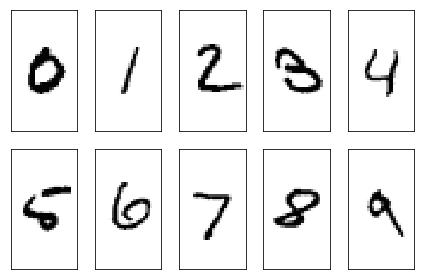

In [91]:
fig, ax = plt.subplots(
    nrows=2,
    ncols=5,
    sharex=True,
    sharey=True, )

ax = ax.flatten()
for i in range(10):
    img = x_test[y_test == i][0].reshape((28,28))
    ax[i].imshow(img,cmap='Greys', interpolation='nearest')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [92]:
# data pre-processing
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized (-0.5 - 0.5)
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

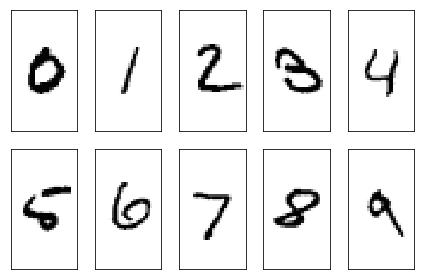

In [93]:
fig, ax = plt.subplots(
    nrows=2,
    ncols=5,
    sharex=True,
    sharey=True, )

ax = ax.flatten()
for i in range(10):
    img = x_test[y_test == i][0].reshape((28,28))
    ax[i].imshow(img,cmap='Greys', interpolation='nearest')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [94]:
x_train.shape

(60000, 784)

In [95]:
x_test.shape

(10000, 784)

In [96]:
# in order to plot in a 2D figure
encoding_dim = 2

input_img = Input(shape=(784,))

In [97]:
# encoder layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim,)(encoded)

In [98]:
# decoder layers
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

In [99]:
# construct the autoencoder model
autoencoder = Model(input=input_img, output=decoded)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [100]:
# construct the encoder model for plotting
encoder = Model(input=input_img, output=encoder_output)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [101]:
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [102]:
# Training
autoencoder.fit(x_train, x_train,
               epochs=20,
               batch_size=256,
               shuffle=True)

Epoch 1/20
60000/60000 [==============================] - 2s - loss: 0.0685     
Epoch 2/20
60000/60000 [==============================] - 2s - loss: 0.0560     
Epoch 3/20
60000/60000 [==============================] - 2s - loss: 0.0503     
Epoch 4/20
60000/60000 [==============================] - 2s - loss: 0.0476     
Epoch 5/20
60000/60000 [==============================] - 2s - loss: 0.0459     
Epoch 6/20
60000/60000 [==============================] - 2s - loss: 0.0445     
Epoch 7/20
60000/60000 [==============================] - 2s - loss: 0.0434     
Epoch 8/20
60000/60000 [==============================] - 2s - loss: 0.0427     
Epoch 9/20
60000/60000 [==============================] - 2s - loss: 0.0421     
Epoch 10/20
60000/60000 [==============================] - 2s - loss: 0.0417     
Epoch 11/20
60000/60000 [==============================] - 2s - loss: 0.0413     
Epoch 12/20
60000/60000 [==============================] - 2s - loss: 0.0410     
Epoch 13/20
60000/60000 [

In [103]:
# plotting
encoded_imgs = encoder.predict(x_test)

In [104]:
encoded_imgs.shape

(10000, 2)

In [105]:
x_test.shape

(10000, 784)

In [106]:
y_test.shape

(10000,)

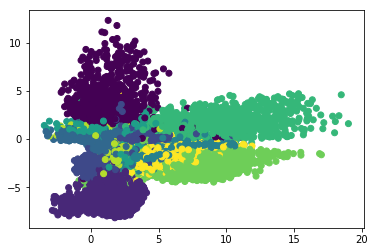

In [107]:
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1],c=y_test)
plt.show()

In [108]:
autoencoded_imgs = autoencoder.predict(x_test)

In [109]:
autoencoded_imgs.shape

(10000, 784)

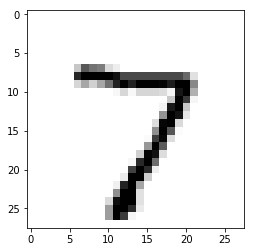

In [110]:
plt.figure()
ximg0 = x_test[0].reshape((28,28))
plt.imshow(ximg0,cmap='Greys', interpolation='nearest')
plt.show()